# Scrape Chicago Tribune

### Screenshot of the paper

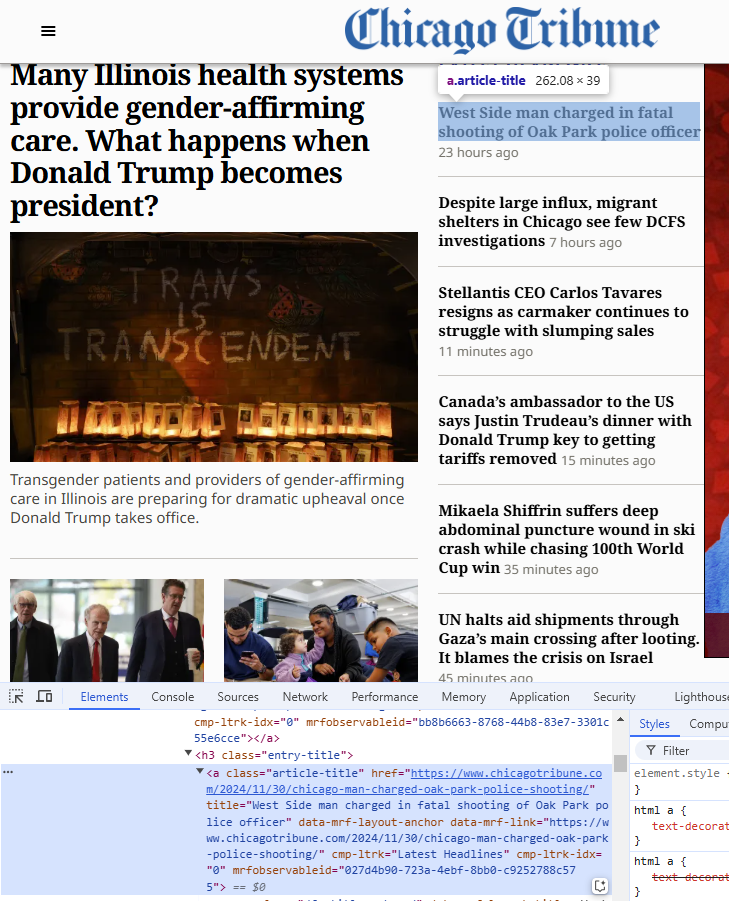

### Sample HTML tag

```html
<a class="article-title" href="https://www.chicagotribune.com/2024/11/30/chicago-man-charged-oak-park-police-shooting/" title="West Side man charged in fatal shooting of Oak Park police officer" data-mrf-layout-anchor="" data-mrf-link="https://www.chicagotribune.com/2024/11/30/chicago-man-charged-oak-park-police-shooting/" cmp-ltrk="Latest Headlines" cmp-ltrk-idx="0" mrfobservableid="027d4b90-723a-4ebf-8bb0-c9252788c575">
	
				<span class="dfm-title metered" data-mrf-layout-title="">
			West Side man charged in fatal shooting of Oak Park police officer		</span>



			</a>
```

Notice that the text of the headline "West Side man charged ..." appears in two places, the middle of the `a` tag and the `span` tag nested under it.

If you don't html or the BeautifulSoup library, you can give a snippet like this to an LLM and ask it to help you extract the headline.

### Code
(you may have to install BeautifulSoup)

In [10]:
from bs4 import BeautifulSoup

In [17]:
html_element = """<a class="article-title" href="https://www.chicagotribune.com/2024/11/30/chicago-man-charged-oak-park-police-shooting/" title="West Side man charged in fatal shooting of Oak Park police officer" data-mrf-layout-anchor="" data-mrf-link="https://www.chicagotribune.com/2024/11/30/chicago-man-charged-oak-park-police-shooting/" cmp-ltrk="Latest Headlines" cmp-ltrk-idx="0" mrfobservableid="027d4b90-723a-4ebf-8bb0-c9252788c575">
    
                <span class="dfm-title metered" data-mrf-layout-title="">
            West Side man charged in fatal shooting of Oak Park police officer		</span>



            </a>"""

In [19]:
soup = BeautifulSoup(html_element, 'html.parser')

In [27]:
headline1 = soup.find('span', class_='dfm-title')
headline1.text.strip()

'West Side man charged in fatal shooting of Oak Park police officer'

In [29]:
headline2 = soup.find('a', class_='article-title')
headline2.text.strip()

'West Side man charged in fatal shooting of Oak Park police officer'

### Find ALL headlines

First, we download the front-page

In [35]:
import requests

In [37]:
%%time
response = requests.get('https://www.chicagotribune.com/')

CPU times: total: 0 ns
Wall time: 176 ms


In [39]:
response

<Response [200]>

In [53]:
print(response.text[:500])

			<!DOCTYPE html>
			<html lang="en-US">
			<head>
				<meta charset="UTF-8"><meta name="application-name" id="app-name" content="chicagotribune"><meta name="viewport" content="width=device-width, initial-scale=1">			<meta name="msvalidate.01" content="4B535F7EB2971D1FCBA5D1D3E3E292C3" />
			<title>Chicago Tribune - Chicago News, Sports, Weather, Business & Things to Do</title>
<link rel='preload' as='image' fetchpriority='high' href='https://www.chicagotribune.com/wp-content/uploads/2023/12/25


In [57]:
html = BeautifulSoup(response.text)

In [73]:
html.find_all(class_="article-title")[:5]

[<a class="article-title" href="https://www.chicagotribune.com/2024/12/01/ihsa-state-football-playoff-pairings/" title="IHSA state football playoffs: See who won the championship games, from 8A to 1A">
 <span class="dfm-title metered">
 			🏈 IHSA state finals		</span>
 </a>,
 <a class="article-title" href="https://www.chicagotribune.com/2024/11/29/chicago-winter-parking-ban-2/" title="Chicago’s winter parking ban goes into effect Sunday. Here’s what to know, snow or no snow.">
 <span class="dfm-title metered">
 			❄️ Winter parking ban		</span>
 </a>,
 <a class="article-title" href="https://www.chicagotribune.com/2024/11/30/chicago-bears-matt-eberflus-timeline/" title="Matt Eberflus’ Chicago Bears timeline: 32 losses, multiple coach firings and too many late-game missteps">
 <span class="dfm-title metered">
 			🏈 Matt Eberflus timeline		</span>
 </a>,
 <a class="article-title" href="https://www.chicagotribune.com/2024/11/26/best-books-2024/" title="10 best books of 2024: The surprising

### Extract headlines

In [81]:
html.find_all(class_="article-title")[0]

<a class="article-title" href="https://www.chicagotribune.com/2024/12/01/ihsa-state-football-playoff-pairings/" title="IHSA state football playoffs: See who won the championship games, from 8A to 1A">
<span class="dfm-title metered">
			🏈 IHSA state finals		</span>
</a>

In [83]:
html.find_all(class_="article-title")[0]['title']

'IHSA state football playoffs: See who won the championship games, from 8A to 1A'

In [87]:
for e in html.find_all(class_="article-title")[:15]:
    print(e['title'])

IHSA state football playoffs: See who won the championship games, from 8A to 1A
Chicago’s winter parking ban goes into effect Sunday. Here’s what to know, snow or no snow.
Matt Eberflus’ Chicago Bears timeline: 32 losses, multiple coach firings and too many late-game missteps
10 best books of 2024: The surprising reads that stuck
Asking-Eric
Today-in-History
Many Illinois health systems provide gender-affirming care. What happens when Donald Trump becomes president?
‘He’s gonna benefit from being with the Speaker’: Madigan trial offers inside view of private dealmaking
US Senate inquiry into Chicago’s housing of migrants at airports likely to heat up after Republican election wins
The Nation of Islam flourished in Chicago after Elijah Muhammad took over from the movement’s founder
Running the ball. Catching the ball. Drew MacPherson does it all as Loyola wins state title. ‘He’s one of a kind.’
West Side man charged in fatal shooting of Oak Park police officer
Despite large influx, migr

In [115]:
headlines = [headline['title'] for headline in html.find_all(class_="article-title")]

In [117]:
headlines[:5]

['IHSA state football playoffs: See who won the championship games, from 8A to 1A',
 'Chicago’s winter parking ban goes into effect Sunday. Here’s what to know, snow or no snow.',
 'Matt Eberflus’ Chicago Bears timeline: 32 losses, multiple coach firings and too many late-game missteps',
 '10 best books of 2024: The surprising reads that stuck',
 'Asking-Eric']

### Write headlines to file

#### Create the filename

In [92]:
import datetime

In [96]:
datetime.datetime.today()

datetime.datetime(2024, 12, 1, 16, 11, 58, 800430)

In [104]:
datetime.datetime.today().strftime('%Y-%m-%d')

'2024-12-01'

In [106]:
TODAY = datetime.datetime.today().strftime('%Y-%m-%d')

In [108]:
TODAY

'2024-12-01'

In [113]:
filename = f"headlines_chicagotribune_{TODAY}.txt"
filename

'headlines_chicagotribune_2024-12-01.txt'

In [127]:
with open(filename, 'w', encoding='utf-8') as output_file:
    for headline in headlines:
        output_file.write(headline + '\n')